In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter

import wfdb

In [16]:
allData = []
y = [];

for i in range(45):

    index = '{:03}'.format(i)
    fileName = 'LabWalks/co' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        #tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(data.T)
        y.append(0)
    
    index = '{:03}'.format(i)
    fileName = 'LabWalks/fl' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        #tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(data.T)
        y.append(1)

print(np.shape(allData[0]))

(6, 3801)


In [36]:
X = np.zeros((len(allData), 12))
for i in range(len(allData)):
    index = 0
    for j in range(6):
        X[i, index] = np.mean(allData[i][j,:])
        index = index + 1
        X[i, index] = np.std(allData[i][j,:])
        index = index + 1

print(X)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xp = scaler.fit_transform(X)

print(Xp)

[[ 9.30419154e-01  2.34041328e-01 -1.48238973e-01  1.29300484e-01
  -3.55052058e-01  2.20322568e-01 -3.96936271e+00  3.06980886e+01
   4.75613753e-01  1.83608536e+01  1.77133226e+00  1.76140553e+01]
 [ 9.22148993e-01  1.67246624e-01 -3.16734514e-02  1.69931135e-01
  -1.28877146e-01  1.60893729e-01  5.88011063e+00  3.23393875e+01
  -3.21844473e-01  1.39150061e+01  4.48866671e+00  2.03135669e+01]
 [ 1.06840535e+00  2.71681923e-01  7.19084282e-02  1.23836380e-01
  -1.81825012e-01  1.61996988e-01 -4.77164600e+00  2.53535219e+01
  -4.77324045e-01  1.39352832e+01  1.04491018e+00  2.20354314e+01]
 [ 9.62670404e-01  1.77335518e-01  9.21859507e-04  1.76680782e-01
  -4.20702879e-01  1.77166833e-01  4.26198144e+00  2.17171689e+01
   1.03942617e-01  1.60892675e+01 -1.48521773e-01  2.27015159e+01]
 [ 1.06393993e+00  2.03070134e-01  8.78291753e-02  1.23041795e-01
   1.27032849e-01  9.60277404e-02  2.44765106e+00  2.69781442e+01
   2.00138389e-01  1.33118553e+01 -1.57147328e-02  9.69836023e+00]
 [ 8.

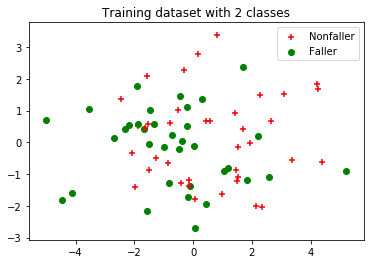

array([0.35460611, 0.1412209 ])

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(Xp)
pca_2d = pca.transform(Xp)


import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif y[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='o')

        
pl.legend([c1, c2], ['Nonfaller', 'Faller'])
pl.title('Training dataset with 2 classes')
pl.show()

pca.explained_variance_ratio_

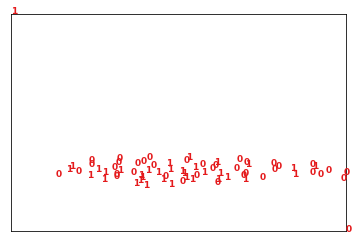

In [37]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        
from sklearn import manifold
#降维
tsne = manifold.TSNE(n_components=2, init='pca', random_state=1)

X_tsne = tsne.fit_transform(Xp)
#绘图
plot_embedding(X_tsne,y*5)
plt.show()

In [38]:
print(X_tsne)

[[ 5.54376144e+01  1.10391342e+02]
 [ 1.04970684e+01  5.50258064e+01]
 [ 7.99468384e+01  2.32307377e+01]
 [-5.87260208e+01  5.30361404e+01]
 [ 3.20505638e+01 -2.59003448e+01]
 [ 4.92671471e+01  1.40925217e+02]
 [-1.46075516e+02  1.86618311e+03]
 [ 1.19365891e+02 -2.97806110e+01]
 [ 9.68966293e+01 -3.58852959e+01]
 [ 8.29825821e+01  5.91851730e+01]
 [-3.60983734e+01 -3.87698555e+01]
 [ 1.39290863e+02 -7.84487305e+01]
 [-1.08774605e+01  2.97014904e+01]
 [ 1.12712013e+02 -6.89518976e+00]
 [ 1.88160286e+01 -3.92051291e+00]
 [ 3.06377621e+01 -1.20433350e+02]
 [-5.44641838e+01  1.72422466e+01]
 [-7.85705719e+01  8.75177307e+01]
 [-9.58758850e+01  5.73556366e+01]
 [-3.40508881e+01  1.23453148e+02]
 [-1.67990417e+01 -8.68361816e+01]
 [-5.54652557e+01  1.12245407e+02]
 [-6.73882217e+01 -1.07732563e+01]
 [ 1.77766685e+01  8.66402893e+01]
 [ 2.58118000e+01  3.88982582e+01]
 [-4.02218781e+01 -1.31905609e+02]
 [ 2.85371513e+01  6.71359177e+01]
 [ 9.59805984e+01  3.89108009e+01]
 [ 7.85809937e+01  9